In [202]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

df1 = pd.read_csv('MHEALTHDATASET/subject1.csv')
df2 = pd.read_csv('MHEALTHDATASET/subject2.csv')
df3 = pd.read_csv('MHEALTHDATASET/subject3.csv')
df4 = pd.read_csv('MHEALTHDATASET/subject4.csv')
df5 = pd.read_csv('MHEALTHDATASET/subject5.csv')
df6 = pd.read_csv('MHEALTHDATASET/subject6.csv')
df7 = pd.read_csv('MHEALTHDATASET/subject7.csv')
df8 = pd.read_csv('MHEALTHDATASET/subject8.csv')
df9 = pd.read_csv('MHEALTHDATASET/subject9.csv')
df10 = pd.read_csv('MHEALTHDATASET/subject10.csv')

In [203]:
df1 = df1[df1['Unnamed: 0'] != 3050]
df1 = df1.drop(columns=['Unnamed: 0'], axis=1)
df2 = df2[df2['Unnamed: 0'] != 3050]
df2 = df2.drop(columns=['Unnamed: 0'], axis=1)
df3 = df3[df3['Unnamed: 0'] != 3050]
df3 = df3.drop(columns=['Unnamed: 0'], axis=1)
df4 = df4[df4['Unnamed: 0'] != 3050]
df4 = df4.drop(columns=['Unnamed: 0'], axis=1)
df5 = df5[df5['Unnamed: 0'] != 3050]
df5 = df5.drop(columns=['Unnamed: 0'], axis=1)
df6 = df6[df6['Unnamed: 0'] != 3050]
df6 = df6.drop(columns=['Unnamed: 0'], axis=1)
df7 = df7[df7['Unnamed: 0'] != 3050]
df7 = df7.drop(columns=['Unnamed: 0'], axis=1)
df8 = df8[df8['Unnamed: 0'] != 3050]
df8 = df8.drop(columns=['Unnamed: 0'], axis=1)
df9 = df9[df9['Unnamed: 0'] != 3050]
df9 = df9.drop(columns=['Unnamed: 0'], axis=1)
df10 = df10[df10['Unnamed: 0'] != 3050]
df10 = df10.drop(columns=['Unnamed: 0'], axis=1)

In [204]:
df1

,acc_anklex,acc_ankley,acc_anklez,acc_armx,acc_army,acc_armz,gyro_anklex,gyro_ankley,gyro_anklez,label
0,4.3791,-10.2060,0.148050,-7.0015,-10.0890,3.0789,0.59184,-0.52345,0.48919,1
1,5.4713,-9.5863,-0.216270,-6.3209,-10.0260,2.3737,0.62338,-0.55347,0.39489,1
2,4.1823,-9.5796,-0.530910,-4.5576,-10.1840,1.6471,0.62338,-0.55347,0.39489,1
3,1.4208,-9.3857,0.044924,-3.2267,-9.5227,1.7322,0.62338,-0.55347,0.39489,1
4,3.1137,-9.6868,-0.359450,-2.6922,-8.1222,1.7814,0.64007,-0.59475,0.33792,1
...,...,...,...,...,...,...,...,...,...,...
18300,3.7136,1.8317,8.910000,-7.3820,1.3429,6.2859,0.38219,0.65478,0.34971,6
18301,3.7437,1.6411,8.661200,-6.9890,1.3252,6.5246,0.38219,0.65478,0.34971,6
18302,3.5400,1.8215,8.886900,-7.3843,1.3536,6.3593,0.38219,0.65478,0.34971,6
18303,3.4789,1.6416,8.710600,-7.2773,1.4543,6.4269,0.38776,0.65478,0.34774,6


In [205]:
def pro(df,i):
    label=df['label']
    df.drop(['label'],axis=1,inplace=True)
    return df,label

In [206]:
# 3000개만 사용 uci랑 똑같이 맞추기 activity도 6개 같은걸로만! 센서도 2개만,,,,,,, 50hz는 1초에 50hz라는말
#preprocessiong하고 csv하고 이완한테 파일보내기 subject마다!!!!!!!!!!!!!!! => 18000개 1subject => federated learning 하고 보내줄것임
#CNN과도 비교해야함

In [207]:
df1,label1=pro(df1,1)
df2,label2=pro(df2,2)
df3,label3=pro(df3,3)
df4,label4=pro(df4,4)
df5,label5=pro(df5,5)
df6,label6=pro(df6,6)
df7,label7=pro(df7,7)
df8,label8=pro(df8,8)
df9,label9=pro(df9,9)
df10,label10=pro(df10,10)

In [224]:
'''testx = pd.concat([df9,df10])
testy = pd.concat([label9,label10])'''
testx = np.concatenate((df8,df9,df10),axis=0)
testy = np.concatenate((label8,label9,label10),axis=0)

In [225]:
def make_data(df):
    scaler = MinMaxScaler()
    df=pd.DataFrame(scaler.fit_transform(df[:]))
    return df
df1 = make_data(df1)
df2 = make_data(df2)
df3 = make_data(df3)
df4 = make_data(df4)
df5 = make_data(df5)
df6 = make_data(df6)
df7 = make_data(df7)
#df8 = make_data(df8)
test = make_data(testx)

In [226]:
def polar(df) : 
    dataf = pd.DataFrame(index=range(0,len(df)), columns=range(0,9))
    for i in range(0,9,3) :
        for j in range(len(df)) :
            xy = df[i][j]**2 +df[i+1][j]**2
            dataf[i][j] = np.sqrt(xy+df[i+2][j]**2)
            dataf[i+1][j] = np.arctan2(np.sqrt(xy), df[i+2][j])
            dataf[i+2][j] = np.arctan2(df[i+1][j],df[i][j])

    return dataf

In [227]:
df1

,0,1,2,3,4,5,6,7,8
0,0.627839,0.230824,0.439782,0.360414,0.216900,0.549714,0.656040,0.581153,0.795869
1,0.653820,0.246020,0.431575,0.376799,0.218445,0.531520,0.666889,0.570682,0.769740
2,0.623158,0.246184,0.424486,0.419250,0.214570,0.512773,0.666889,0.570682,0.769740
3,0.557467,0.250939,0.437459,0.451292,0.230790,0.514969,0.666889,0.570682,0.769740
4,0.597738,0.243556,0.428349,0.464160,0.265141,0.516238,0.672630,0.556282,0.753954
...,...,...,...,...,...,...,...,...,...
18295,0.612008,0.526010,0.637177,0.351253,0.497299,0.632454,0.583926,0.992145,0.757221
18296,0.612724,0.521336,0.631572,0.360715,0.496865,0.638612,0.583926,0.992145,0.757221
18297,0.607879,0.525760,0.636656,0.351198,0.497562,0.634347,0.583926,0.992145,0.757221
18298,0.606425,0.521349,0.632685,0.353774,0.500032,0.636091,0.585842,0.992145,0.756675


In [228]:
polar1 = polar(df1)
polar2 = polar(df2)
polar3 = polar(df3)
polar4 = polar(df4)
polar5 = polar(df5)
polar6 = polar(df6)
polar7 = polar(df7)
#polar8 = polar(df8)
polartest = polar(test)

In [229]:
polar1

,0,1,2,3,4,5,6,7,8
0,0.800544,0.989205,0.35231,0.692191,0.653165,0.541748,1.183864,0.833534,0.724942
1,0.821136,1.017397,0.359893,0.687174,0.686474,0.525388,1.167441,0.850857,0.707815
2,0.793171,1.00608,0.37624,0.696238,0.742927,0.473038,1.167441,0.850857,0.707815
3,0.751738,0.949697,0.422972,0.72258,0.777483,0.472725,1.167441,0.850857,0.707815
4,0.774656,0.984892,0.386923,0.743133,0.802823,0.518995,1.153398,0.858359,0.691004
...,...,...,...,...,...,...,...,...,...
18295,1.028219,0.902449,0.709973,0.877886,0.766377,0.955841,1.377935,0.988991,1.038839
18296,1.022793,0.90524,0.704987,0.885898,0.765748,0.942846,1.377935,0.988991,1.038839
18297,1.025315,0.900859,0.713087,0.879377,0.765033,0.956164,1.377935,0.988991,1.038839
18298,1.019728,0.901487,0.710103,0.883063,0.766527,0.955053,1.378448,0.98971,1.037406


In [230]:
polar1[:][0]

0        0.800544
1        0.821136
2        0.793171
3        0.751738
4        0.774656
           ...   
18295    1.028219
18296    1.022793
18297    1.025315
18298    1.019728
18299    1.025858
Name: 0, Length: 18300, dtype: object

In [231]:
len(polar1)

18300

In [232]:
def make_images(polar) :
    mergegasf = pd.DataFrame(columns=range(0,9), index =range(0,366))
    for i in range (0,9):
        p = 0
        for j in range(0,len(polar),50):
            X = np.array(polar[j:j+49][i]).reshape(1,-1)
            Xgasf = GramianAngularField(image_size=24, method='summation')
            Xgasf = Xgasf.fit_transform(X)
            mergegasf[i][p] = Xgasf
            p = p+1
    return mergegasf

In [233]:
m = pd.DataFrame(columns=range(0,9), index =range(0,366))
m

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
mergegasf1 = make_images(polar1)

In [235]:
len(mergegasf1[0][0][0][0])
#366 366 1 24 24

24

In [236]:
mergegasf2 = make_images(polar2)
mergegasf3 = make_images(polar3)
mergegasf4 = make_images(polar4)
mergegasf5 = make_images(polar5)
mergegasf6 = make_images(polar6)
mergegasf7 = make_images(polar7)
mergegasf7 = make_images(polar7)
#mergegasf8 = make_images(polar8)
mergegasftest = make_images(polartest)
#35174,1,21,21

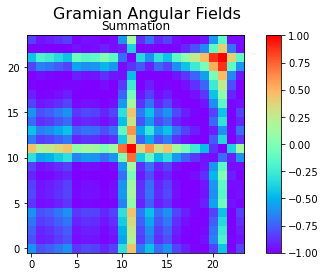

In [237]:
def show_image(images):
    fig = plt.figure(figsize=(8, 4))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 1),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.3,
                     ) 
    titles = ['Summation']
    for image, title, ax in zip(images, titles, grid):
        im = ax.imshow(image, cmap='rainbow', origin='lower')
        ax.set_title(title, fontdict={'fontsize': 12})
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
    plt.show()

images = [mergegasf1[0][0][0]]
show_image(images)   

In [238]:
import os
import tensorflow as tf
from tensorflow import reshape
from collections import OrderedDict
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from sklearn.metrics import accuracy_score

In [239]:
mergegasf1[0][0][0][0]

array([-0.61050563, -0.79373841, -0.75613609, -0.68755002, -0.61262406,
       -0.86361853, -0.81904562, -0.83321823, -0.90098415, -0.82991464,
       -0.31658807,  0.4413017 , -0.68113928, -0.45036461, -0.72257699,
       -0.60772233, -0.82228104, -0.9193469 , -0.97938258, -0.99967847,
       -0.82345532, -0.44130172, -0.99824552, -0.83070115])

In [240]:
def transpose(mergegasf):
    mergegasf= np.transpose(mergegasf.values.tolist(),(0,3,4,1,2))
    mergegasf = mergegasf.reshape(*mergegasf.shape[:-1])
    return mergegasf

In [241]:
mergegasf1= transpose(mergegasf1)
mergegasf2= transpose(mergegasf2)
mergegasf3= transpose(mergegasf3)
mergegasf4= transpose(mergegasf4)
mergegasf5= transpose(mergegasf5)
mergegasf6= transpose(mergegasf6)
mergegasf7= transpose(mergegasf7)
#mergegasf8= transpose(mergegasf8)
mergegasftest= transpose(mergegasftest)

In [242]:
def make_label(label):
    label2 = []
    for i in range(1,367) :
        label2.append(label[i*50-1])
    return label2

In [243]:
label1 = make_label(label1)
label2 = make_label(label2)
label3 = make_label(label3)
label4 = make_label(label4)
label5 = make_label(label5)
label6 = make_label(label6)
label7 = make_label(label7)
#label8 = make_label(label8)
labeltest = make_label(testy)


In [244]:
def make_client(mergegasf,label):

    X, Y = [],[]
    X = mergegasf
    Y = label
    Y = pd.get_dummies(Y)
    dataset = tf.data.Dataset.from_tensor_slices((list(X),Y))
    
    return dataset.shuffle(len(Y)).batch(27)#원래는 64

In [245]:
len(mergegasf1)
len(label1)

366

In [246]:
clients_batched = dict()
clients_batched[1] = make_client(mergegasf1,label1)
clients_batched[2] = make_client(mergegasf2,label2)
clients_batched[3] = make_client(mergegasf3,label3)
clients_batched[4] = make_client(mergegasf4,label4)
clients_batched[5] = make_client(mergegasf5,label5)
clients_batched[6] = make_client(mergegasf6,label6)
clients_batched[7] = make_client(mergegasf7,label7)
#clients_batched[8] = make_client(mergegasf8,label8)

In [247]:
clients_batched

{1: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>,
 2: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>,
 3: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>,
 4: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>,
 5: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>,
 6: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>,
 7: <BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>}

In [248]:
def make_test(mergegasf,label):
    X, Y = [],[]
    X = mergegasf
    Y = tuple(label)
    Y = pd.get_dummies(Y)
    return X,Y

In [249]:
testx,testy = make_test(mergegasftest,labeltest)

In [250]:
len(testx)

366

In [251]:
len(testy)

366

In [252]:
testbatched = tf.data.Dataset.from_tensor_slices((testx,testy)).batch(len(testy))
testbatched

<BatchDataset shapes: ((None, 24, 24, 9), (None, 6)), types: (tf.float64, tf.uint8)>

In [ ]:
'''label1=np.expand_dims(label1, axis=1)
label2=np.expand_dims(label2, axis=1)
label3=np.expand_dims(label3, axis=1)
label4=np.expand_dims(label4, axis=1)
label5=np.expand_dims(label5, axis=1)
label6=np.expand_dims(label6, axis=1)
label7=np.expand_dims(label7, axis=1)
label8=np.expand_dims(label8, axis=1)'''

In [253]:
def create_keras_model():

    # Create keras model
    model = Sequential()

    # 1st convolution layer
    model.add(Input(shape=(24,24,9)))

    model.add(Conv2D(filters=32,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))

    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))

    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))
    
    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    # Compile the model
    #model.compile(loss=SparseCategoricalCrossentropy(),
    #              optimizer=SGD(learning_rate=0.02),
    #              metrics=[SparseCategoricalAccuracy()])
    
    return model

# Summary model
keras_model = create_keras_model()
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        1184      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [254]:
from tensorflow.keras.optimizers import Adam
lr = 0.0001  #원래 0.01
comms_round = 50
loss='categorical_crossentropy'
metrics = ['CategoricalAccuracy']
optimizer = SGD(learning_rate=lr, decay=lr / comms_round, momentum=0.99)   

#optimizer = Adam(learning_rate=lr, decay=lr / comms_round) 

In [255]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1)) 
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [256]:
#initialize global model
import random
global_model = create_keras_model()
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        local_model = create_keras_model()
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=10, verbose=0) #epoch 1: 18% 10 :20% 100 :
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in testbatched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)

comm_round: 0 | global_acc: 54.645% | global_loss: 1.7685781717300415
comm_round: 1 | global_acc: 53.552% | global_loss: 1.6927211284637451
comm_round: 2 | global_acc: 59.563% | global_loss: 1.5640887022018433
comm_round: 3 | global_acc: 63.115% | global_loss: 1.498883843421936
comm_round: 4 | global_acc: 68.033% | global_loss: 1.464184045791626
comm_round: 5 | global_acc: 74.044% | global_loss: 1.4337998628616333
comm_round: 6 | global_acc: 77.869% | global_loss: 1.4102915525436401
comm_round: 7 | global_acc: 79.508% | global_loss: 1.3912855386734009
comm_round: 8 | global_acc: 80.601% | global_loss: 1.3764808177947998
comm_round: 9 | global_acc: 81.694% | global_loss: 1.3614453077316284
comm_round: 10 | global_acc: 81.694% | global_loss: 1.3493989706039429
comm_round: 11 | global_acc: 80.601% | global_loss: 1.3395076990127563
comm_round: 12 | global_acc: 84.153% | global_loss: 1.3291467428207397
comm_round: 13 | global_acc: 86.066% | global_loss: 1.3215593099594116
comm_round: 14 | g

KeyboardInterrupt: 